<a href="https://colab.research.google.com/github/karanja-john/dsc-phase-1-project-v2-4/blob/master/John_karanja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1 Project Submission :Microsoft Movie Studio

Please fill out:
* Student name: John Karanja
* Student pace: full time
* Scheduled project review date/time: 16/4/2023
* Instructor name: 
* Blog post URL:


#Introduction 


# 1.0  Project Overview 


Microsoft is looking to create a new movie studio, but they don't have any experience in the movie industry. The goal of this project is to explore movies datasets  and generate insights that can help Microsoft decide what types of films to create.

To achieve this goal, I will use exploratory data analysis on movie datasets from IMDB (im.db.zip) and Box office movie (bom.movie_gross.csv.gz). I will explore various factors that contribute to a movie's success, such as genre, ratings, director, and budget.

My analysis will be guided by the following data analytic question: What are the key factors that contribute to a movie's box office success, and how can Microsoft leverage these insights to make data-driven decisions for their new movie studio?

To measure the success of our analysis, we will focus on metrics such as average box office revenue, total box office revenue & movie ratings

The final deliverable of this project will be a set of actionable insights that Microsoft can use to inform their decision-making. These insights will include recommendations for which genres, ratings, directors, and release dates to prioritize for their movie projects.

Overall, this project will provide valuable insights into the current movie industry  and help Microsoft make informed decisions for their new movie studio.

1.2 Specify the Data analytic question 

What are the key factors that contribute to a movie's box office success?




## 2.1 Loading and reading Our Datasets

In [74]:
#importing  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#loading and reading the datasets
bom_movies= pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')

In [76]:
# Print the first few rows of Box office movies
print(bom_movies.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


#2.2 Checking the data 



In [77]:
# Determining the no. of records in our result dataset
print("bom_movies", bom_movies.shape)


bom_movies (3387, 5)


**observation**: box office movies has 3383 records and 5 variables.

In [78]:
# Previewing the top 5 of bom_movies dataset
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [79]:
# Previewing the bottom of our bom_movies dataset
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [80]:
# Checking the columns datatype
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Observation :The dataset has object, float and Integer datatypes. I have also noted that Domestic_gross has missing values and foreign_gross also has alot of missing values .the data type in foreign_gross is object instead of being a float as it represent total amount in foreign bom sales.  

# 2.3 Data Cleaning 

In [81]:
# Check for missing values
print(bom_movies.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Observation:foreign_gross has the most missing values i.e 1350 out of 3387 

In [82]:
# Check for duplicates
print(bom_movies.duplicated().sum())

0


Remark:There are no duplicates 

In [83]:
# droping column with most missing values 
bom_movies.drop(["foreign_gross"], axis=1, inplace=True)
bom_movies.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


# 3.0 Exploratory Data Analysis

In [84]:
# to get descriptive statistics from the data 
bom_movies[['title', 'studio', 'domestic_gross', 'year']].describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [85]:
# to get descriptive statistics from the bom movies after replacing missing values with average 
bom_movies[['title', 'studio', 'domestic_gross', 'year']].describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#3.1 grouping the data by studio and plotting 

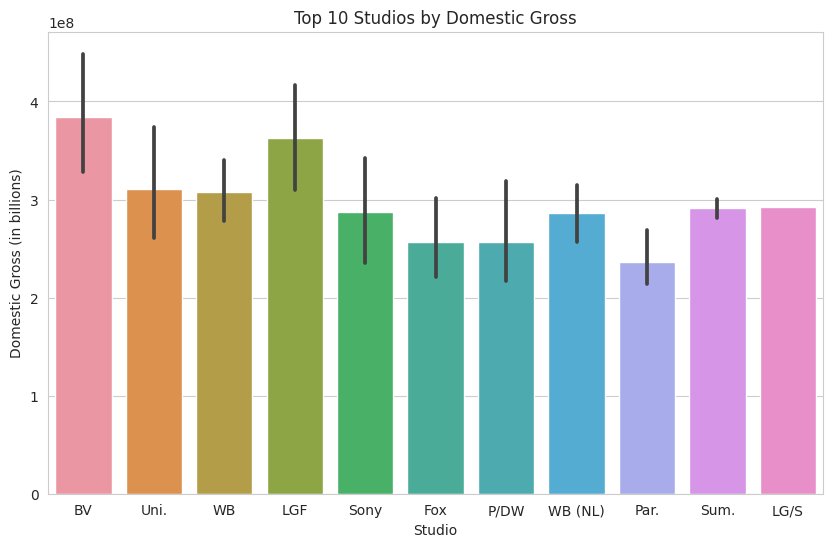

In [86]:
## sort by domestic gross
studio_gross = bom_movies.sort_values('domestic_gross', ascending=False)

# top 10 studios by domestic gross
top10_studios = studio_gross.head(100)

# plot the top 10 studios by domestic gross
plt.figure(figsize=(10,6))
sns.barplot(x='studio', y='domestic_gross', data=top10_studios)
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in billions)')
plt.show()

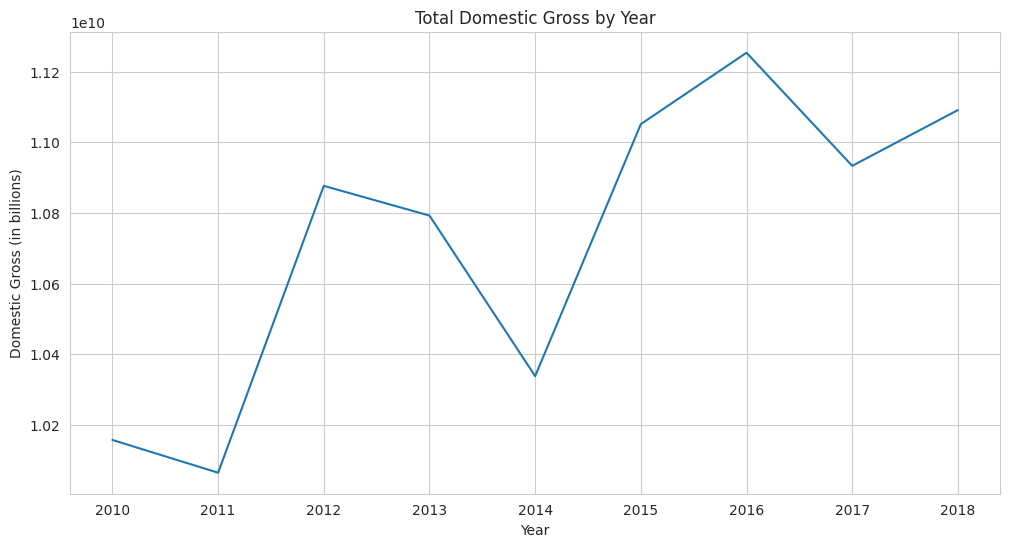

In [87]:

# group by year and calculate the total domestic gross
year_gross = bom_movies.groupby('year')['domestic_gross'].sum().reset_index()

# plot the total domestic gross by year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='domestic_gross', data=year_gross)
plt.title('Total Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Domestic Gross (in billions)')
plt.show()

# group by year and calculate the average domestic gross
year_avg = bom_movies.groupby('year')['domestic_gross'].mean().reset_index()

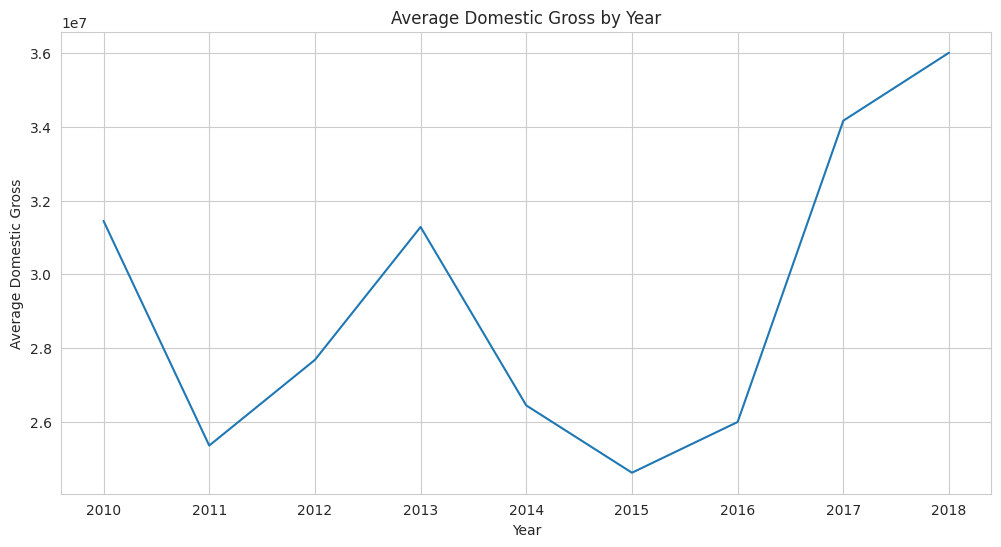

In [88]:
# group by year and calculate the average domestic gross
year_avg = bom_movies.groupby('year')['domestic_gross'].mean().reset_index()

# plot the average domestic gross by year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='domestic_gross', data=year_avg)
plt.title('Average Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.show()

Remark:this visualization helps determine trend over time 

In [89]:
#year_avg statistics
year_avg.describe()

,year,domestic_gross
count,9.000000,9.000000e+00
mean,2014.000000,2.921928e+07
std,2.738613,4.131086e+06
min,2010.000000,2.461338e+07
25%,2012.000000,2.598996e+07
50%,2014.000000,2.767584e+07
75%,2016.000000,3.144559e+07
max,2018.000000,3.601042e+07


count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64


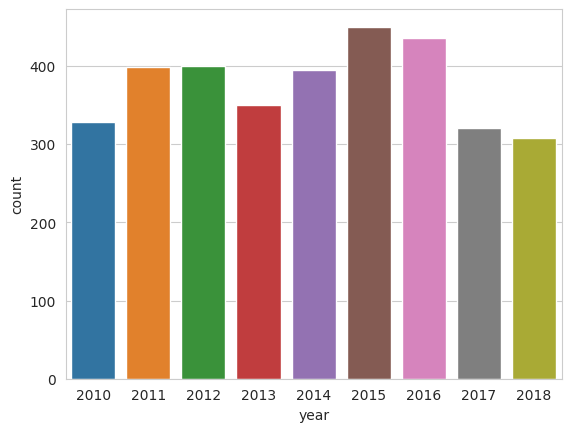

In [90]:
# Univariate analysis for 'year'
print(bom_movies['year'].describe())
sns.countplot(x='year', data=bom_movies)
plt.show()

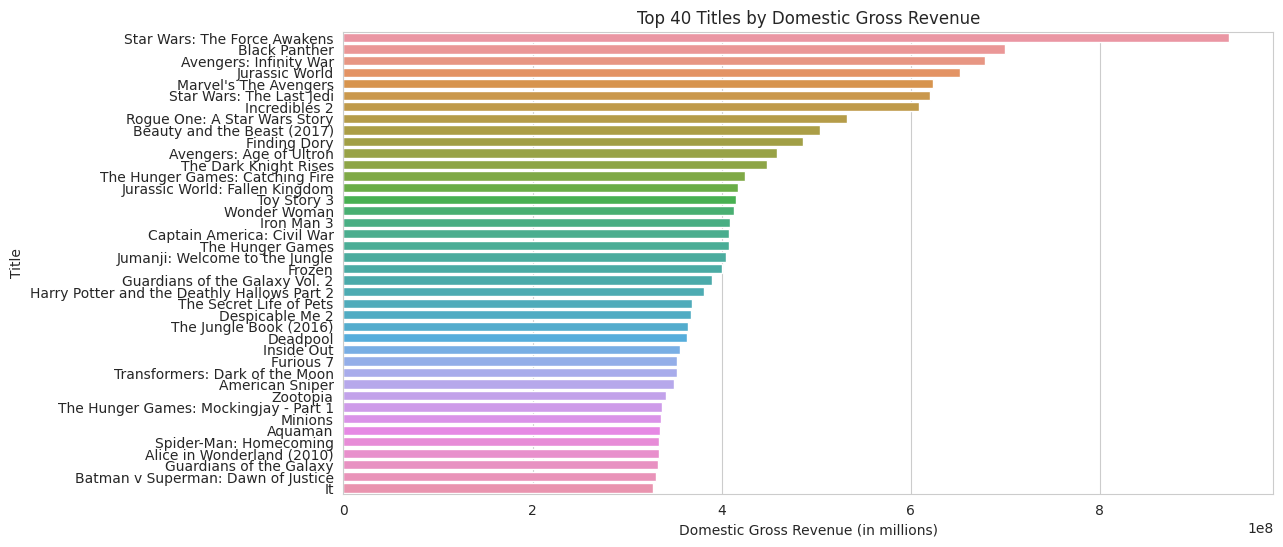

In [91]:
# Creating a new dataframe with top 40 titles by domestic gross revenue
top_titles = bom_movies[['title', 'domestic_gross']].sort_values('domestic_gross', ascending=False).head(40)

# ploting  a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='domestic_gross', y='title', data=top_titles)
plt.title('Top 40 Titles by Domestic Gross Revenue')
plt.xlabel('Domestic Gross Revenue (in millions)')
plt.ylabel('Title')
plt.show()

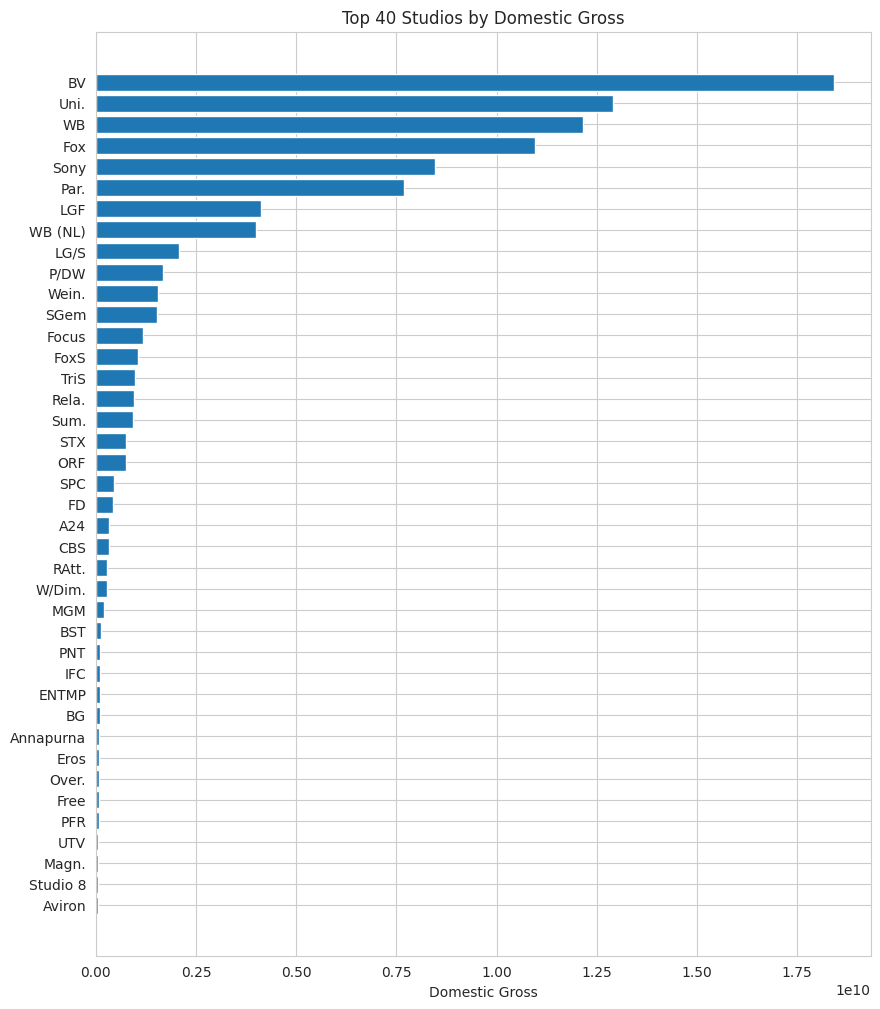

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
# group the data by studio and sum the domestic gross
studio_gross = bom_movies.groupby('studio')['domestic_gross'].sum()

# sort the values in descending order and take the top 40
top_studios = studio_gross.sort_values(ascending=False)[:40]

# create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10,12))
ax.barh(top_studios.index, top_studios.values, align='center')
ax.invert_yaxis()  # invert y-axis to show the studios in descending order
ax.set_xlabel('Domestic Gross')
ax.set_title('Top 40 Studios by Domestic Gross')
plt.show()

## **4.0 Data interpretation**

4.1 The top studios  domestic gross revenue 

In [93]:

#  calling  the top 10 movies by domestic gross revenue
top10_studios.head(10)

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,2017
3082,Incredibles 2,BV,608600000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,2017
2324,Finding Dory,BV,486300000.0,2016


4.2 Top 10  studios 

They include studio
BV ,Uni.,WB ,Fox Sony,Par. LGF  ,WB (NL),LG/S, P/DW

In [94]:
top_studios.head(10)

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.459683e+09
Par.       7.685871e+09
LGF        4.118963e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

4.3 Total domestic gross vs year 

There seems to be an overall increase in the domestic gross revenue year over year 

# **5.0 Recommendations**

1.There is an upward trend  between the year of release and domestic gross revenue. Therefore, Microsoft's new movie studio should focus on producing movies given that there is an opportunity due to the upward trajectory .

2.The mean domestic gross revenue for movies released between 2010 and 2018 is approximately $29 million. Therefore, Microsoft's new movie studio should set of around the same if they want to compete with the top and this will also help in setting a budget as it is the industry mean.

In [95]:
year_avg.describe()

,year,domestic_gross
count,9.000000,9.000000e+00
mean,2014.000000,2.921928e+07
std,2.738613,4.131086e+06
min,2010.000000,2.461338e+07
25%,2012.000000,2.598996e+07
50%,2014.000000,2.767584e+07
75%,2016.000000,3.144559e+07
max,2018.000000,3.601042e+07


3.0 Microsoft can partner or shadow the best perfoming studios in terms of  domestic_gross to give themselves a chance of sucess in the industry They include studio BV ,Uni.,WB ,Fox Sony,Par. LGF ,WB (NL),LG/S, P/DW.

5.1 Limitations
- The dataset has a few variables which limits the areas/variables  in which we can extact insights from .e.g if there was a varable  for genre it would help pinpoint which genres Microsot can focus on to ensure sucess 
